In [1]:
import numpy as np
from numpy.linalg import inv, det, multi_dot
import random
import math
from sklearn.datasets.samples_generator import make_blobs
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

https://vincentarelbundock.github.io/Rdatasets/doc/car/Davis.html

In [2]:
df = pd.read_csv("Davis.csv")
df["isMale"]= (df["sex"] == "M").astype(int)

In [3]:
y = df.as_matrix(columns=["isMale"]).reshape(200)
X = df.as_matrix(columns=["weight", "height"])

In [4]:
mu_weight, mu_height= np.mean(X, axis =0)
sd_weight, sd_height = np.std(X, axis = 0)
X_norm = np.stack([(X[:,0]-mu_weight)/sd_weight, (X[:,1]-mu_height)/sd_height], axis= -1)

In [5]:
X = X_norm

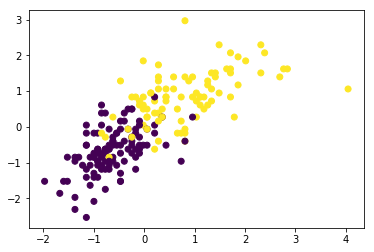

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_norm[:,0],X_norm[:,1], c= y)

In [7]:
# dim of data
N, D = X.shape

Sig =  np.identity(D)
mu_0 = np.array([0,0])
Lambda_0 = np.identity(D)
Sig_inv = inv(Sig)
Lam_0_inv = inv(Lambda_0)

alpha = 1

In [8]:
def dMVN(x, mu, sig):
    d = x.shape[0]
    if d != mu.shape[0] or d != sig.shape[0]:
        print("Unmatched dimension")
        return None
    return (2*math.pi)**(-d/2) * (det(sig))**(-0.5) * math.exp(-0.5* multi_dot([np.transpose(x-mu),inv(sig),(x-mu)]))

In [9]:
zt = list(range(N))
length = []
for run in range(1000):
    #zt_new = list(range(N))
    for i in range(N):
        ext_cluster = zt[0:i]+zt[i+1:N]
        cluster_cnt = Counter(ext_cluster)
        p = {}
        # exisiting
        for c in cluster_cnt:
            n_c = cluster_cnt.get(c)
            A = (n_c+1)*Sig_inv+Lam_0_inv
            A_inv = inv(A)
            c_idx = np.where(np.asarray(zt) == c)[0]
            b = np.matmul(Sig_inv, np.sum([X[j] for j in c_idx], axis = 0))+np.matmul(Lam_0_inv,mu_0)
            sig_i_star = inv(np.subtract(Sig_inv, multi_dot([Sig_inv, A_inv, Sig_inv])))
            mu_i_star = multi_dot([sig_i_star, Sig_inv, A_inv, b])
            f = dMVN(X[i], mu_i_star, sig_i_star)
            p[c] = n_c*f
        # new
        c = list(set(range(N))-set(ext_cluster))[0]
        A = Sig_inv+Lam_0_inv
        A_inv = inv(A)
        b = np.matmul(Lam_0_inv,mu_0)
        sig_i_star = inv(np.subtract(Sig_inv, multi_dot([Sig_inv, A_inv, Sig_inv])))
        mu_i_star = multi_dot([sig_i_star, Sig_inv, A_inv, b])
        f = dMVN(X[i], mu_i_star, sig_i_star)
        p[c] = alpha * f
        clusters = list(p.keys())
        zt[i] = random.choices(clusters, weights=[p.get(cl) for cl in clusters], k=1)[0]
    length.append(len(set(zt)))
    if run % 100 == 0:
        print("Done {} runs".format(run))

Done 0 runs
Done 100 runs
Done 200 runs
Done 300 runs
Done 400 runs
Done 500 runs
Done 600 runs
Done 700 runs
Done 800 runs
Done 900 runs


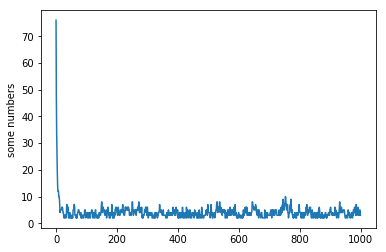

In [10]:
plt.plot(length)
plt.ylabel('some numbers')
plt.show()

In [12]:
np.mean(length[500:])

3.8799999999999999

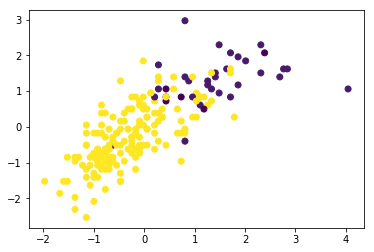

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=zt)

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [16]:
kmeans.labels_

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

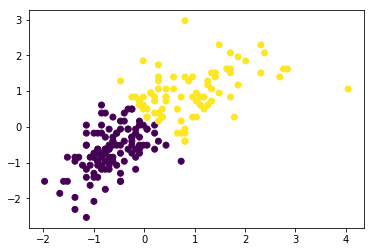

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)